## INTRODUCTION


Beta Bank's customers are leaving slowly each month. Bankers have discovered that it is cheaper to retain existing customers than to attract new ones. We need to predict whether a customer will leave the bank soon. We have data on the past behavior of customers and contract terminations with the bank. 

___Request___

- The bank is looking fo an F1 score of at least 0.59
- Create a model to predict whether a customer will leave the bank soon.

This Dataset come from the ___TrippleTen - Data Scientis Course___.

## DATA DESCRIPTION
Churn.csv
- RowNumber: index of the data entry
- CustomerId: unique customer identifier
- Surname: last name
- CreditScore: credit score value
- Geography: country of residence
- Gender: gender of the customer
- Age: age of the customer
- Tenure: the period (in years) during which the customer has held a fixed-term deposit
- Balance: account balance
- NumOfProducts: number of banking products used by the customer
- HasCrCard: whether the customer has a credit card (1 - yes; 0 - no)
- IsActiveMember: customer activity status (1 - active; 0 - inactive)
- EstimatedSalary: estimated salary of the customer

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 
from sklearn.tree import DecisionTreeClassifier     # ML
from sklearn.ensemble import RandomForestClassifier # ML
from sklearn.linear_model import LogisticRegression # ML
from sklearn.metrics import f1_score, roc_auc_score # Metrics
from sklearn.utils import shuffle

In [317]:
bbank = pd.read_csv("Churn.csv")

In [318]:
bbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [319]:
bbank.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
868,869,15646810,Quinn,603,Germany,Male,44,6.0,108122.39,2,1,0,108488.33,1
4724,4725,15578648,Marino,543,Germany,Male,49,6.0,59532.18,1,1,0,104253.56,0
6435,6436,15754874,Nwoye,700,France,Male,26,4.0,119009.57,1,1,0,141926.43,0
358,359,15633950,Yen,737,France,Male,41,1.0,101960.74,1,1,1,123547.28,0
8021,8022,15697691,Sinclair,512,France,Female,41,6.0,0.00,1,1,1,100507.81,0
5595,5596,15616431,Chiu,608,France,Male,33,4.0,0.00,1,0,1,130474.03,0
36,37,15788448,Watson,490,Spain,Male,31,3.0,145260.23,1,0,1,114066.77,0
4558,4559,15623730,Ch'iu,792,France,Male,34,1.0,0.00,1,0,1,86330.32,0
100,101,15808582,Fu,665,France,Female,40,6.0,0.00,1,1,1,161848.03,0
4155,4156,15708003,Aleksandrova,587,Spain,Male,41,8.0,85109.21,1,1,0,1557.82,0


In [320]:
print(f"Duplicates : {bbank.duplicated().sum()}")

Duplicates : 0


Active Customer: 7963
Exited Customer: 2037


C:\Users\JoseC\AppData\Local\Temp\ipykernel_17052\3851403706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f_summary.index, y=f_summary.values, palette='Set2')


Text(0, 0.5, 'Frequency')

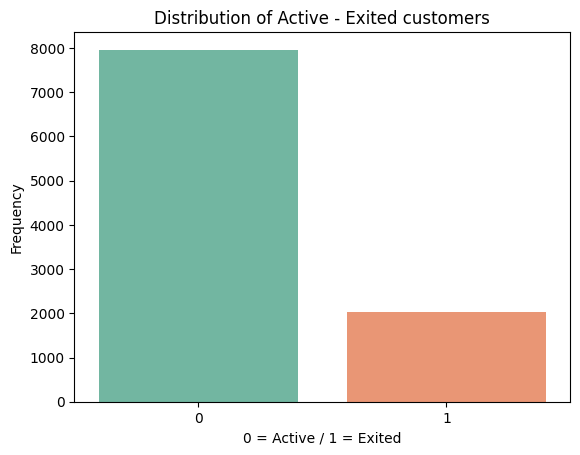

In [321]:
# Viewing target values
f_summary = bbank['Exited'].value_counts()
print(f"Active Customer: {f_summary[0]}\nExited Customer: {f_summary[1]}")

# Chart
sns.barplot(x=f_summary.index, y=f_summary.values, palette='Set2')

# Settings
plt.title('Distribution of Active - Exited customers')
plt.xlabel('0 = Active / 1 = Exited')
plt.ylabel('Frequency')

Remarks

- The ___RowNumber, CustomerId, and Surname___ columns do not add value to the dataframe for implementing a machine learning model, so we will proceed to remove them.
- The ___Tenure___ column should be of type int64, and we will replace any missing values with 0.
- As a convention, all column names will be converted to lowercase.
- The ___Exited___ column will be used as the target variable, and the remaining columns will be considered as features.
- Based on the chart, we can observe a 4:1 imbalance

## PRE-PROCESSING

In [322]:
# Dropping features
bbank = bbank.drop(columns=['RowNumber','CustomerId','Surname'])

# Configuring columns names
bbank.columns = bbank.columns.str.lower()

# Fillin NaN
bbank['tenure'].fillna(0.0,inplace=True)

# Changing datatypes 
bbank['tenure'] = bbank['tenure'].astype('int64')

C:\Users\JoseC\AppData\Local\Temp\ipykernel_17052\701677440.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bbank['tenure'].fillna(0.0,inplace=True)


## DATA SEGMENTATION

Data Segmentation - Training (60%) - Validation (20%) - Test (20%)

In [323]:
total = bbank['age'].count() 

# One-Hot Encoding
data_ohe = pd.get_dummies(bbank, drop_first=True)

# Getting 20% (test)
df_remaining, df_test = train_test_split(data_ohe,test_size=0.20, random_state=1996)

# Getting 60% (Training) and 20% (Validation) 
df_train, df_valid = train_test_split(df_remaining,test_size=0.25, random_state=1996)

# Validating distribution
train_pct = round((df_train['age'].count() / total) *100,2)
valid_pct = round((df_valid['age'].count() / total) *100,2)
test_pct = round((df_test['age'].count() / total) *100,2)
print(f"From 100% of the data, the following was selected:\n{train_pct}% for training.\n{valid_pct}% for validation.\n{test_pct}% for testing.")

From 100% of the data, the following was selected:
60.0% for training.
20.0% for validation.
20.0% for testing.


In [324]:
#Train
features_train = df_train.drop('exited',axis = 1)
target_train = df_train['exited']

#Validation
features_valid = df_valid.drop('exited',axis = 1)
target_valid = df_valid['exited']

#Test
features_test = df_test.drop('exited',axis = 1)
target_test = df_test['exited']

## TRAININIG MODELS

### Data Balancing

In [325]:
# Function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1996)
    
    return features_upsampled, target_upsampled

In [326]:
# Balancing according to our chart
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

exited
0    4813
1    4748
Name: count, dtype: int64


### Decision Tree

In [327]:
b_depth = 0
dt_bf1 = 0

for depth in range(1,50):  
    model_dtc = DecisionTreeClassifier(random_state=1996, max_depth=depth) 
    model_dtc.fit(features_upsampled,target_upsampled)

    prediction_valid = model_dtc.predict(features_valid)
    f1 = f1_score(target_valid,prediction_valid)
    probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]
    dt_auc = roc_auc_score(target_valid,probabilities_valid)
    if f1 > dt_bf1:
        dt_bf1 = f1
        b_depth = depth

print(f'Best F1: {dt_bf1}\nAUC-ROC: {dt_auc}\nBest depth:{b_depth}')

Best F1: 0.5735294117647058
AUC-ROC: 0.672157836272301
Best depth:4


Remarks

- In this case, we have obtained an F1 score slightly lower than the minimum required by the bank. So this model is not going to be an option.

### Random Forest

In [328]:
# Creating a function
def rfc_model_test(f_train,t_train,f_valid,t_valid,weight = None, estimator = 100,max_depth = 25):
    b_est = 0
    b_depth = 0
    rf_bf1 = 0

    for est in range (1,estimator,10):
        for depth in range(1,max_depth):
            model_rfc = RandomForestClassifier(random_state=1996, n_estimators=est, max_depth = depth, class_weight = weight)
            model_rfc.fit(f_train,t_train)
            p_valid = model_rfc.predict(f_valid)
            f1 = f1_score(t_valid,p_valid)
            probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]
            rf_auc = roc_auc_score(target_valid,probabilities_valid)
            if f1 > rf_bf1:
                rf_bf1 = f1
                b_est = est
                b_depth = depth

    print(f'Best F1: {rf_bf1}\nAUC-ROC: {rf_auc}\nEstimator: {b_est}\nDepth: {b_depth}')

    return rf_bf1, rf_auc

In [329]:
rf_bf1, rf_auc = rfc_model_test(features_upsampled,target_upsampled,features_valid,target_valid)

Best F1: 0.6335697399527187
AUC-ROC: 0.8479966900075104
Estimator: 61
Depth: 11


Remarks

- In this case, we have obtained an F1 score slightly above the minimum threshold set by the bank.

### Logistic Regression

In [330]:
model_lr = LogisticRegression(random_state=1996, solver='liblinear') 

model_lr.fit(features_upsampled,target_upsampled)
predicted_valid = model_lr.predict(features_valid)
lr_bf1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
lr_auc = roc_auc_score(target_valid,probabilities_valid)
print(f"Best F1: {lr_bf1}\nAUC-ROC: {lr_auc}")

Best F1: 0.46307053941908716
AUC-ROC: 0.7249872952054579


Remarks

- In this third model, we can observe that its F1 score is well below the required threshold.


## TESTING BEST MODEL

In [331]:
index = ['DecisionTree','RandomForest','LogisticRegression']
columns = ['F1 Score','AUC-ROC']
values = [[dt_bf1,dt_auc],[rf_bf1,rf_auc],[lr_bf1,lr_auc]]

metrics_summary = pd.DataFrame(values,index=index,columns=columns)
metrics_summary

,F1 Score,AUC-ROC
DecisionTree,0.573529,0.672158
RandomForest,0.633570,0.847997
LogisticRegression,0.463071,0.724987


Remarks
- Based on the previous table metrics, the best option to use after balacing the data is the RandomForest model with a ___F1: 0.636 and AUC-ROC:0.846___

In [333]:
t_model = RandomForestClassifier(max_depth=10, n_estimators=51, random_state=1996)
t_model.fit(features_upsampled,target_upsampled)
predict_test = t_model.predict(features_test)
f1 = f1_score(target_test,predict_test)
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_valid)

print(f"F1 score: {f1}\n AUC_ROC: {auc_roc}")

F1 score: 0.6128680479825518
 AUC_ROC: 0.7249872952054579


## FINAL CONCLUTION


In conclusion, after adjusting and compensating for the classes, it was determined that the best ML model obtained is the Random Forest with the following parameters:
RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=51, random_state=1996), using repeat = 4.

Although this set of adjustments does not yield the highest F1 score, when tested with the test data subset, it shows the smallest difference between the validation model and the test model. Additionally, its AUC-ROC value is very similar in both models.

___One reason why the F1 score did not achieve excellent results could be due to the amount of data we're working with, or perhaps because there are insufficient correlations in the features for the model to improve its effectiveness.___